In [1]:
%matplotlib notebook
import numpy as np
import pandas
import matplotlib.pyplot as plt

from sedkcorr.sed_fitting import lephare

In [2]:
data = {"mag_FUV":24.34941529151189, "mag_FUV.err":0.2808529712437018, "mag_NUV":23.131763356831183,
        "mag_NUV.err":0.09311475654141255, "mag_u":20.91321870241184, "mag_u.err":0.17575489046042136,
        "mag_g":19.027929430034394, "mag_g.err":0.011213086618905521, "mag_r":18.131317367139847,
        "mag_r.err":0.008302712573136972, "mag_i":17.708476613246482, "mag_i.err":0.008509995022562222,
        "mag_z":17.381505953770187, "mag_z.err":0.027499037334056453, "CONTEXT":127, "Z-SPEC":0.05821464776210461,
        "STRING":"SN2006ob"}

try:
    data_test = pandas.DataFrame(data)
except(ValueError):
    for k, v in data.items():
        data[k] = [v]
    data_test = pandas.DataFrame(data)
data_test

,mag_FUV,mag_FUV.err,mag_NUV,mag_NUV.err,mag_u,mag_u.err,mag_g,mag_g.err,mag_r,mag_r.err,mag_i,mag_i.err,mag_z,mag_z.err,CONTEXT,Z-SPEC,STRING
0,24.349415,0.280853,23.131763,0.093115,20.913219,0.175755,19.027929,0.011213,18.131317,0.008303,17.708477,0.00851,17.381506,0.027499,127,0.058215,SN2006ob


In [3]:
test_fit = lephare.LePhareSEDFitter()

In [4]:
test_fit.set_data(data=data, results_path="/Users/mart1/Desktop/Libraries/sedkcorr/test/lephare/data.out")

In [5]:
test_fit.describe_params("input")

STAR_SED : $LEPHAREDIR/sed/STAR/STAR_MOD.list (comented? : False)
STAR_FSCALE : 3.432E-09 (comented? : False)
STAR_LIB : LIB_STAR (comented? : False)
QSO_SED : $LEPHAREDIR/sed/QSO/QSO_MOD.list (comented? : False)
QSO_FSCALE : 1 (comented? : False)
QSO_LIB : LIB_QSO (comented? : False)
GAL_SED : $LEPHAREDIR/sed/GAL/BC03_CHAB/BC03_MOD.list (comented? : False)
GAL_FSCALE : 1. (comented? : False)
GAL_LIB : LIB_BC03 (comented? : False)
SEL_AGE : $LEPHAREDIR/sed/GAL/BC03_CHAB/BC03_AGE.list (comented? : False)
AGE_RANGE : 0.,13.55e9 (comented? : False)
FILTER_LIST : galex/FUV.pb,galex/NUV.pb,sdss/up.pb,sdss/gp.pb,sdss/rp.pb,sdss/ip.pb,sdss/zp.pb (comented? : False)
TRANS_TYPE : 0 (comented? : False)
FILTER_CALIB : 0 (comented? : False)
FILTER_FILE : galex_sdss.filt (comented? : False)
STAR_LIB_IN : LIB_STAR (comented? : False)
STAR_LIB_OUT : STAR (comented? : False)
QSO_LIB_IN : LIB_QSO (comented? : False)
QSO_LIB_OUT : QSO (comented? : False)
GAL_LIB_IN : LIB_BC03 (comented? : False)
GAL_LIB

In [6]:
test_fit.run_filter()

In [7]:
test_fit.run_sedtolib()

In [8]:
test_fit.run_mag_star()

In [9]:
test_fit.run_mag_gal()

In [10]:
test_fit.run_zphota()

In [29]:
testd = test_fit._get_data_()
testd

,mag_0,mag_0.err,mag_1,mag_1.err,mag_2,mag_2.err,mag_3,mag_3.err,mag_4,mag_4.err,mag_5,mag_5.err,mag_6,mag_6.err,CONTEXT,Z-SPEC,STRING_0
0,24.349415,0.280853,23.131763,0.093115,20.913219,0.175755,19.027929,0.011213,18.131317,0.008303,17.708477,0.00851,17.381506,0.027499,127,0.058215,SN2006ob


In [44]:
testr = np.random.normal(loc=[testd["mag_0"], testd["mag_1"]], 
                         scale=[testd["mag_0.err"], testd["mag_1.err"]], size=(2,10))
testr

array([[24.1359052 , 24.63812376, 24.55462664, 24.49372038, 24.59237537,
        24.50042944, 23.98901723, 24.30027867, 24.41764018, 24.01091272],
       [23.148265  , 22.92643106, 22.97942457, 23.15268365, 23.21917021,
        23.22083792, 23.09063809, 23.03832435, 23.32183336, 22.9956468 ]])

In [45]:
testr[0,1] = 0
testr

array([[24.1359052 ,  0.        , 24.55462664, 24.49372038, 24.59237537,
        24.50042944, 23.98901723, 24.30027867, 24.41764018, 24.01091272],
       [23.148265  , 22.92643106, 22.97942457, 23.15268365, 23.21917021,
        23.22083792, 23.09063809, 23.03832435, 23.32183336, 22.9956468 ]])

In [46]:
testr = pandas.DataFrame(testr.T)
testr

,0,1
0,24.135905,23.148265
1,0.000000,22.926431
2,24.554627,22.979425
3,24.493720,23.152684
4,24.592375,23.219170
5,24.500429,23.220838
6,23.989017,23.090638
7,24.300279,23.038324
8,24.417640,23.321833
9,24.010913,22.995647


In [49]:
np.mean(testr, axis=1)

0    23.642085
1    11.463216
2    23.767026
3    23.823202
4    23.905773
5    23.860634
6    23.539828
7    23.669302
8    23.869737
9    23.503280
dtype: float64

In [25]:
testd["mag_0"] = 99.
testd

,mag_0,mag_0.err,mag_1,mag_1.err,mag_2,mag_2.err,mag_3,mag_3.err,mag_4,mag_4.err,mag_5,mag_5.err,mag_6,mag_6.err,CONTEXT,Z-SPEC,STRING_0
0,99.0,0.280853,23.131763,0.093115,20.913219,0.175755,19.027929,0.011213,18.131317,0.008303,17.708477,0.00851,17.381506,0.027499,127,0.058215,SN2006ob


In [50]:
from sedkcorr.k_correction import sed_lephare

In [51]:
test_sed = sed_lephare.SED_LePhare()

In [52]:
_, fit_res_file, _ = test_fit._get_param_details_("CAT_OUT")
data_out = sed_lephare.lephare_output_file_reader(fit_res_file, ["FUV", "NUV", "u", "g", "r", "i", "z"])
data_out

,IDENT,Z_BEST,CHI_BEST,MOD_BEST,EXTLAW_BEST,EBV_BEST,DIST_MOD_BEST,NBAND_USED,Z_SEC,CHI_SEC,...,MASS_MED,MASS_SUP,SFR_BEST,SFR_INF,SFR_MED,SFR_SUP,SSFR_BEST,SSFR_INF,SSFR_MED,SSFR_SUP
0,0,0.0582,11.3499,3,1,0.15,37.0792,7,-99.0,1.000000e+09,...,9.74698,9.79652,-2.01089,-2.05734,-1.94603,-1.75882,-11.7536,-11.8568,-11.7395,-11.4804


In [53]:
test_sed.set_data(sed_index=0, sed_dir="/Users/mart1/Desktop/Libraries/sedkcorr/test/lephare/", 
                  data_meas=data_test, col_syntax=["mag_band", "mag_band.err"])

<IPython.core.display.Javascript object>


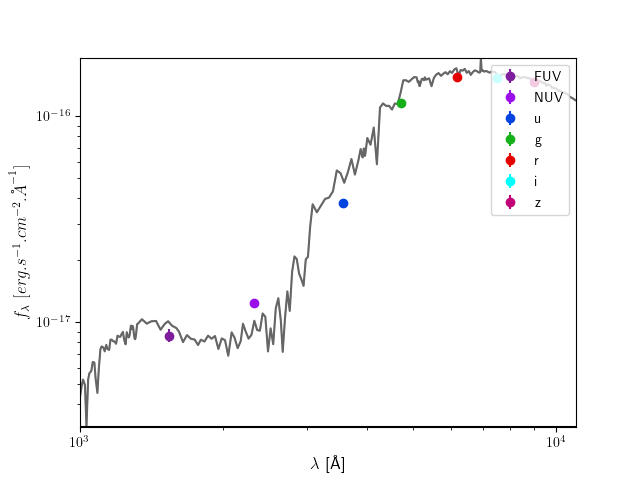

{'ax': <matplotlib.axes._subplots.AxesSubplot at 0x1823db6898>,
 'fig': <Figure size 640x480 with 1 Axes>}

In [54]:
test_sed.show(y_plot="flux", sed_shifted=False, plot_bandpasses=False, plot_filter_points=True, 
              xlim=(1000, 11000), ylim=(None, None), savefile=None, xscale="log", yscale="log", 
              flux_unit="AA")